<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%208/Assignment_8_Trial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install asgnmt8-0.0.0-py3-none-any.whl


In [2]:
from torchvision import transforms
from asgnmt8.DataLoader import cifar_data_loader,View_images
transform_params = transforms.Compose([transforms.RandomHorizontalFlip(),  
                                       transforms.RandomRotation(10),  
                                       transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),  
                                       transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

trainloader,testloader = cifar_data_loader(transform_params,BatchSize=250)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import torch

from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

from asgnmt8.resnet import ResNet18
net = ResNet18().to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [4]:
from asgnmt8.Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn

tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

for epoch in range(30):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
#    scheduler.step()
    acc = tt.test_(net, device, testloader)  
    
   
print('Finished Training')

  0%|          | 0/200 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.4706212282180786 Batch_id=199 Accuracy=33.67: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -1.8903, Accuracy: 4347/10000 (43.47%)

EPOCH: 1


Loss=1.3220031261444092 Batch_id=199 Accuracy=47.69: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -2.5272, Accuracy: 5081/10000 (50.81%)

EPOCH: 2


Loss=1.2202600240707397 Batch_id=199 Accuracy=54.42: 100%|██████████| 200/200 [04:00<00:00,  1.20s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -2.8208, Accuracy: 5620/10000 (56.20%)

EPOCH: 3


Loss=0.9528030157089233 Batch_id=199 Accuracy=59.67: 100%|██████████| 200/200 [04:00<00:00,  1.20s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -3.2194, Accuracy: 6062/10000 (60.62%)

EPOCH: 4


Loss=1.142184853553772 Batch_id=199 Accuracy=63.19: 100%|██████████| 200/200 [04:00<00:00,  1.20s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -3.7457, Accuracy: 6257/10000 (62.57%)

EPOCH: 5


Loss=0.7980615496635437 Batch_id=199 Accuracy=66.37: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -3.9268, Accuracy: 6634/10000 (66.34%)

EPOCH: 6


Loss=0.8478922843933105 Batch_id=199 Accuracy=68.53: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.0928, Accuracy: 6717/10000 (67.17%)

EPOCH: 7


Loss=0.8375036716461182 Batch_id=199 Accuracy=70.45: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.4590, Accuracy: 6899/10000 (68.99%)

EPOCH: 8


Loss=0.8265921473503113 Batch_id=199 Accuracy=72.28: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.6199, Accuracy: 7071/10000 (70.71%)

EPOCH: 9


Loss=0.7554407715797424 Batch_id=199 Accuracy=73.76: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.7796, Accuracy: 6983/10000 (69.83%)

EPOCH: 10


Loss=0.6213209629058838 Batch_id=199 Accuracy=75.48: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.0471, Accuracy: 7252/10000 (72.52%)

EPOCH: 11


Loss=0.5790082812309265 Batch_id=199 Accuracy=76.19: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.1242, Accuracy: 7211/10000 (72.11%)

EPOCH: 12


Loss=0.6169800758361816 Batch_id=199 Accuracy=77.51: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.1978, Accuracy: 7382/10000 (73.82%)

EPOCH: 13


Loss=0.561294674873352 Batch_id=199 Accuracy=78.52: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.4480, Accuracy: 7581/10000 (75.81%)

EPOCH: 14


Loss=0.5176466107368469 Batch_id=199 Accuracy=79.65: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.7063, Accuracy: 7529/10000 (75.29%)

EPOCH: 15


Loss=0.6821579337120056 Batch_id=199 Accuracy=80.50: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.9344, Accuracy: 7573/10000 (75.73%)

EPOCH: 16


Loss=0.6174595355987549 Batch_id=199 Accuracy=81.42: 100%|██████████| 200/200 [04:02<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.9852, Accuracy: 7585/10000 (75.85%)

EPOCH: 17


Loss=0.503563642501831 Batch_id=199 Accuracy=81.97: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.9653, Accuracy: 7757/10000 (77.57%)

EPOCH: 18


Loss=0.552341639995575 Batch_id=199 Accuracy=82.68: 100%|██████████| 200/200 [04:00<00:00,  1.20s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.4395, Accuracy: 7715/10000 (77.15%)

EPOCH: 19


Loss=0.4526705741882324 Batch_id=199 Accuracy=83.28: 100%|██████████| 200/200 [04:00<00:00,  1.20s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.4126, Accuracy: 7832/10000 (78.32%)

EPOCH: 20


Loss=0.42819008231163025 Batch_id=199 Accuracy=83.72: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.5445, Accuracy: 7822/10000 (78.22%)

EPOCH: 21


Loss=0.33996638655662537 Batch_id=199 Accuracy=84.25: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.6647, Accuracy: 7808/10000 (78.08%)

EPOCH: 22


  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.7479, Accuracy: 7831/10000 (78.31%)

EPOCH: 23


Loss=0.4222508370876312 Batch_id=199 Accuracy=85.40: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.6677, Accuracy: 7857/10000 (78.57%)

EPOCH: 24


Loss=0.47060492634773254 Batch_id=199 Accuracy=85.99: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.9489, Accuracy: 7907/10000 (79.07%)

EPOCH: 25


Loss=0.3276635706424713 Batch_id=199 Accuracy=86.34: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.0083, Accuracy: 7851/10000 (78.51%)

EPOCH: 26


Loss=0.46518248319625854 Batch_id=199 Accuracy=86.88: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.0791, Accuracy: 8068/10000 (80.68%)

EPOCH: 27


Loss=0.3562414050102234 Batch_id=199 Accuracy=87.19: 100%|██████████| 200/200 [04:01<00:00,  1.21s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.1497, Accuracy: 8005/10000 (80.05%)

EPOCH: 28


Loss=0.45022672414779663 Batch_id=199 Accuracy=87.85: 100%|██████████| 200/200 [04:05<00:00,  1.23s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.3706, Accuracy: 7986/10000 (79.86%)

EPOCH: 29


Loss=0.3328424096107483 Batch_id=199 Accuracy=88.14: 100%|██████████| 200/200 [04:06<00:00,  1.23s/it]



Test set: Average loss: -7.6971, Accuracy: 8061/10000 (80.61%)

Finished Training


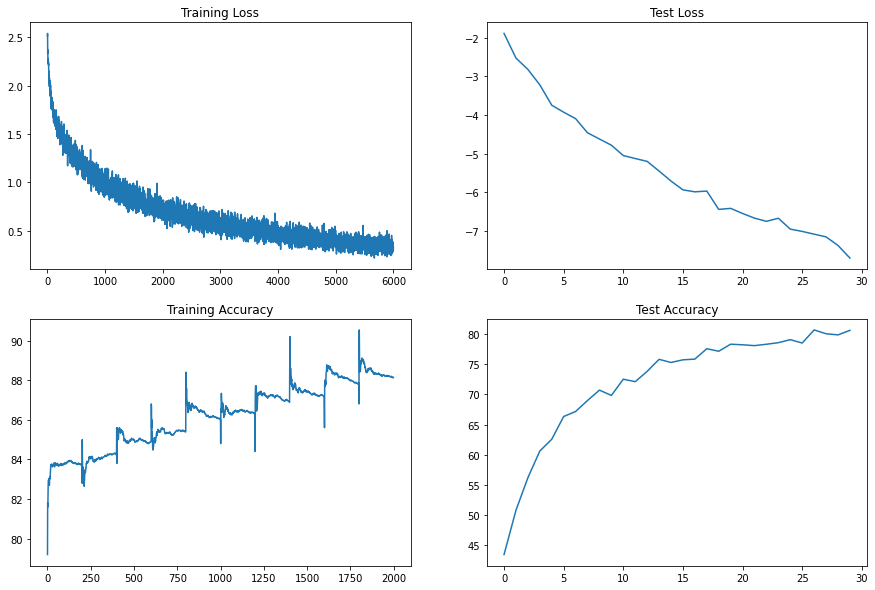

In [5]:
from asgnmt8.ModelPerformance import PlotTrainingGraphs,ViewModelPerformance

PlotTrainingGraphs(tt)

In [6]:
ViewModelPerformance(testloader,model,classes,device)

NameError: ignored